<a href="https://colab.research.google.com/github/KSharif/Deep_learning/blob/main/New_version_paper_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
# Step 1: Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectFromModel
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import label_binarize

In [ ]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [ ]:
# Step 2: Data Exploration and Cleaning
# Combine X and y for exploration
df = pd.concat([X, y], axis=1)

In [ ]:
# Display basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.68976

In [ ]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [ ]:
# Handle missing values (if any)
# Example: Filling missing values with mean (you can change as per dataset requirements)
df.fillna(df.mean(), inplace=True)

In [ ]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [ ]:
# Separate features and target after cleaning
X_clean = df.drop(columns=['num'])  # Corrected to use 'num' as the target column
y_clean = df['num']

In [ ]:
# Step 3: Feature Engineering
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

In [ ]:
# Polynomial Features for interactions
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

In [ ]:
# Feature Selection using Random Forest
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
X_selected = selector.fit_transform(X_poly, y_clean)

In [ ]:
# Step 4: Handle Imbalance using SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_selected, y_clean)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

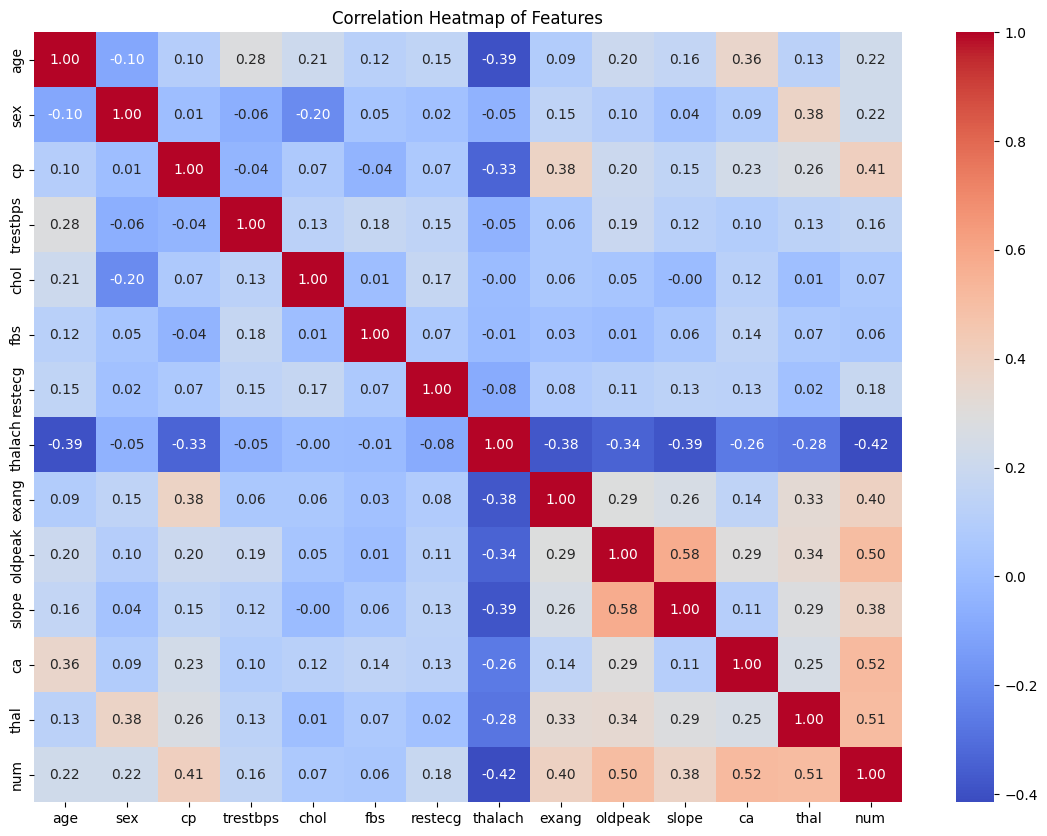

In [ ]:
# 1. Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

<ipython-input-15-0b05fb356f3f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_clean, palette='viridis')


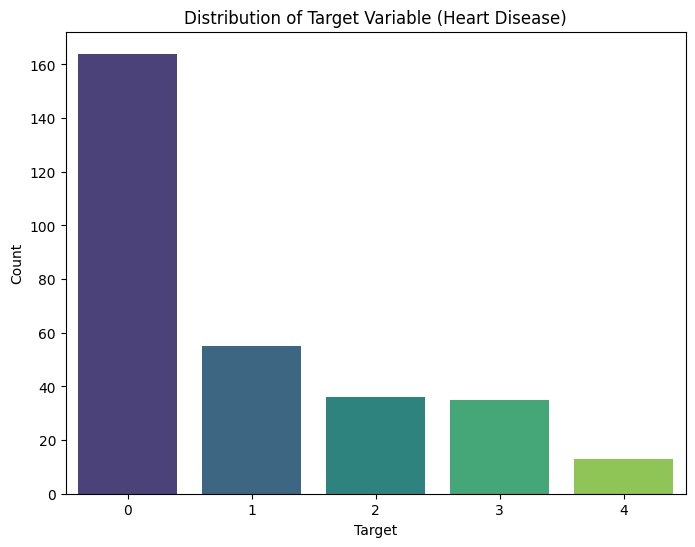

In [ ]:
# 2. Target Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_clean, palette='viridis')
plt.title('Distribution of Target Variable (Heart Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

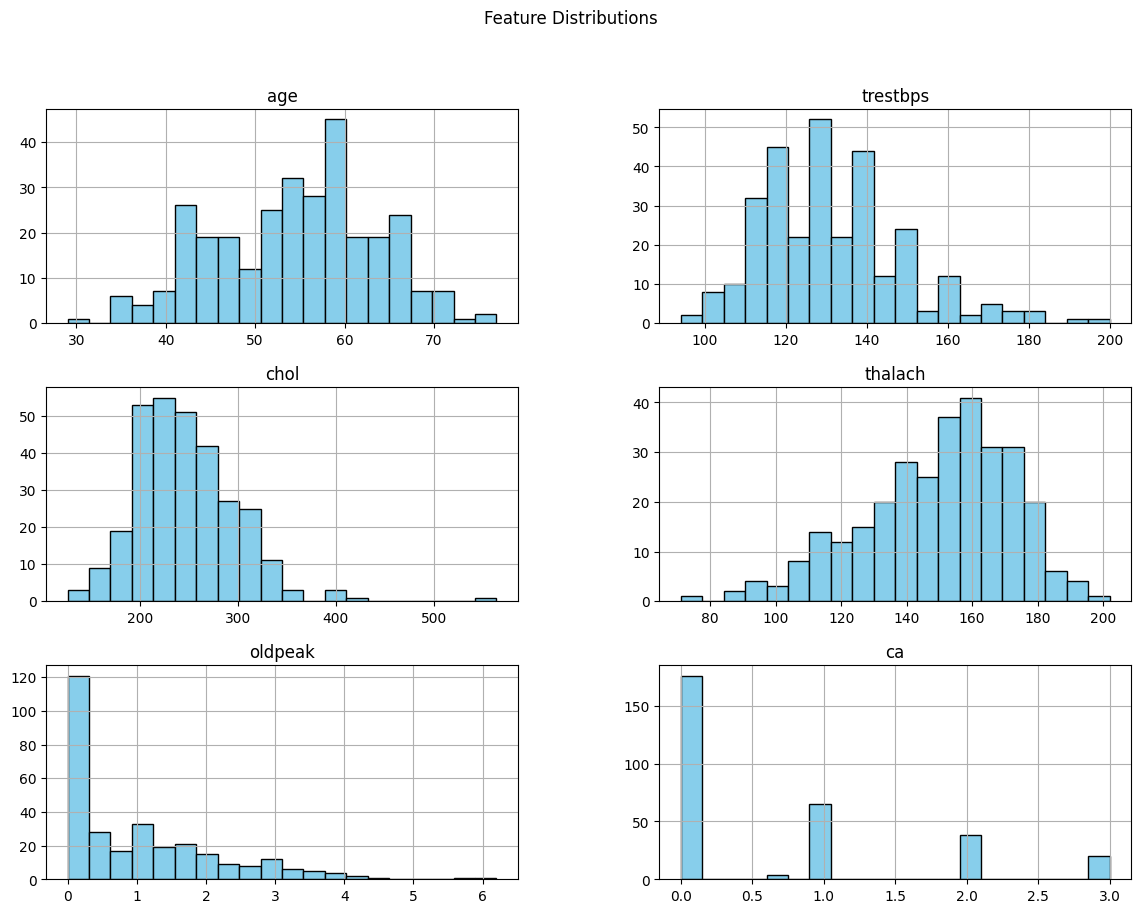

In [ ]:
# 3. Feature Distribution Plots
feature_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']  # Selected important features
df[feature_columns].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

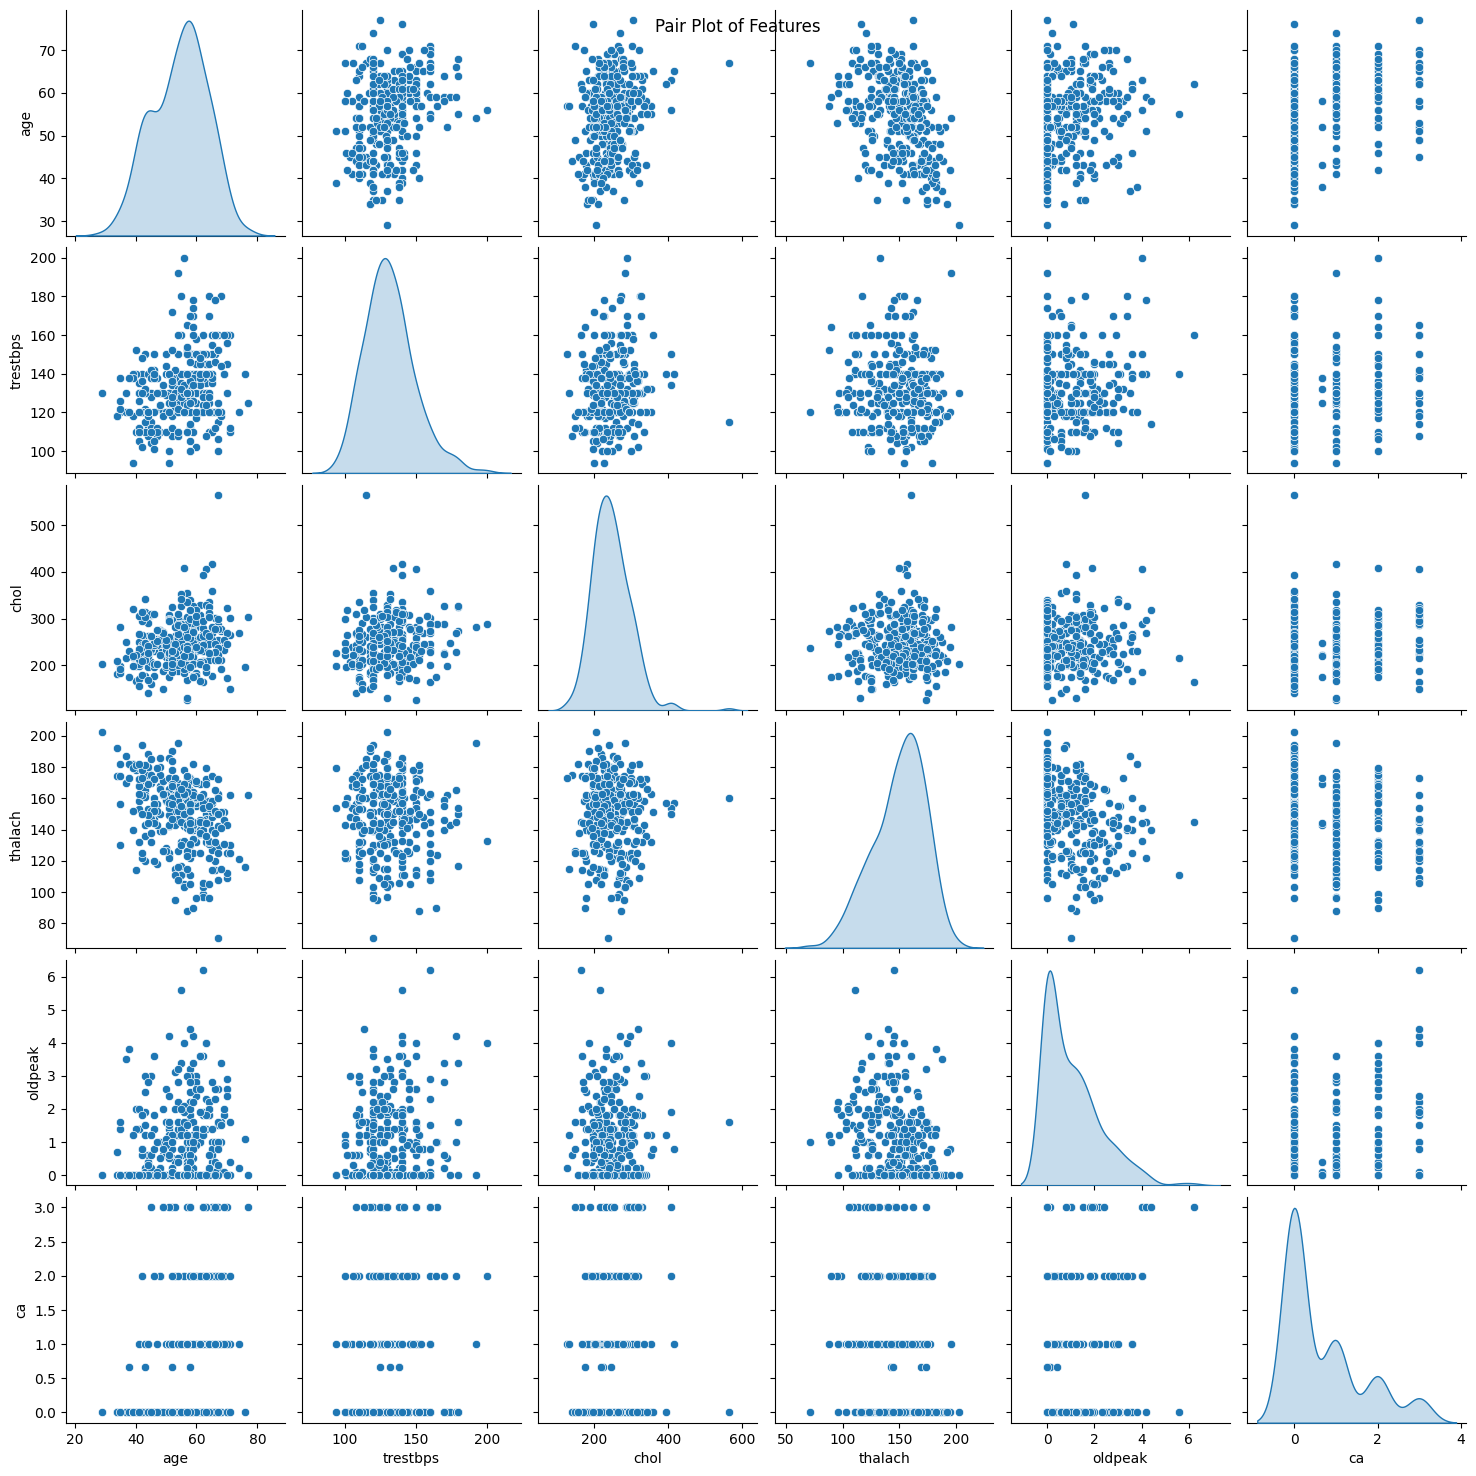

In [ ]:
# 4. Pair Plot to show relationships between features
sns.pairplot(df[feature_columns], diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Features')
plt.show()

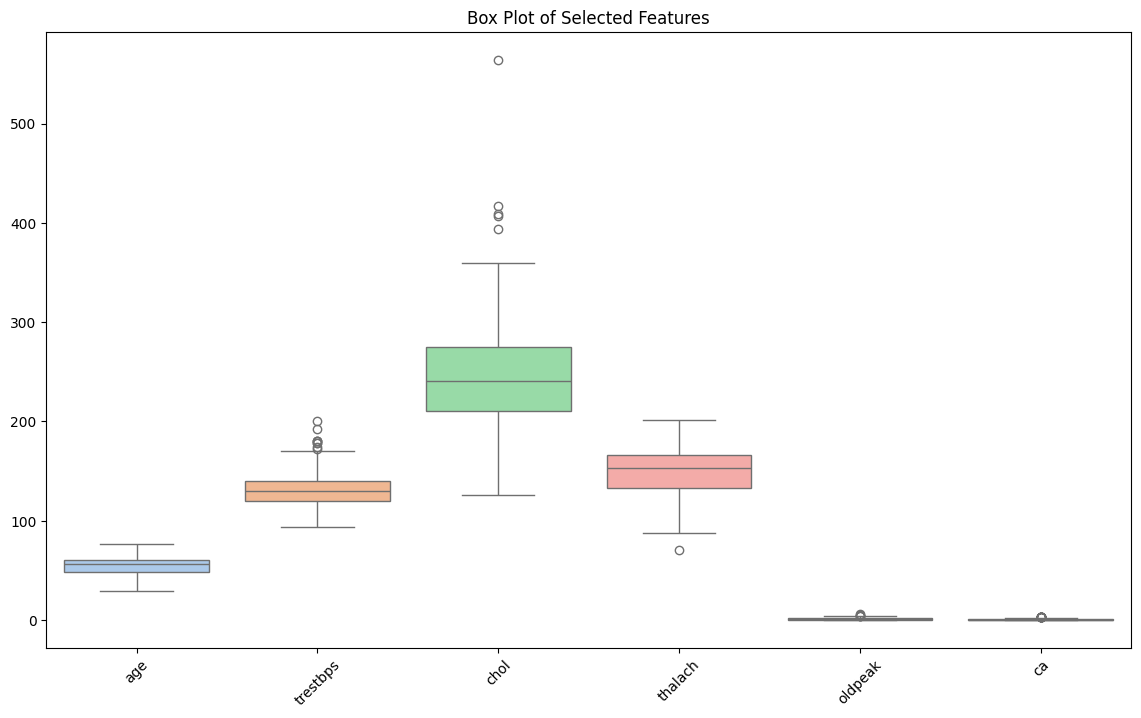

In [ ]:
# 5. Box Plot for Outlier Detection
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[feature_columns], palette='pastel')
plt.title('Box Plot of Selected Features')
plt.xticks(rotation=45)
plt.show()

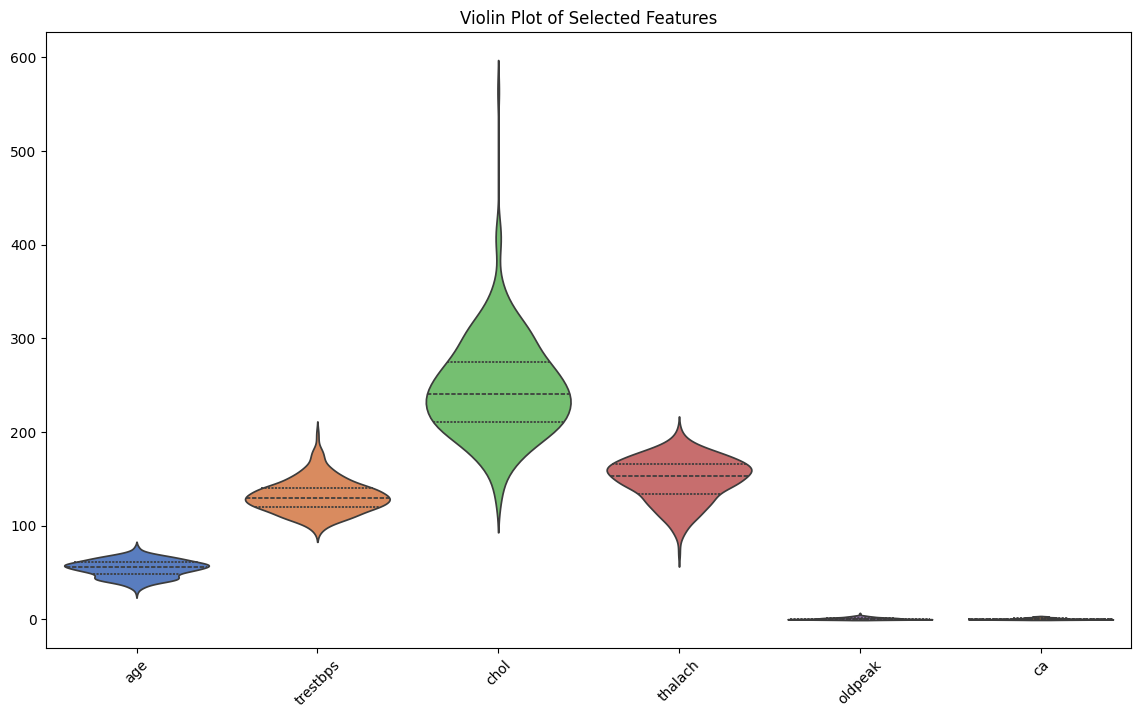

In [ ]:
# 6. Violin Plot to visualize distribution and spread
plt.figure(figsize=(14, 8))
sns.violinplot(data=df[feature_columns], palette='muted', inner='quartile')
plt.title('Violin Plot of Selected Features')
plt.xticks(rotation=45)
plt.show()

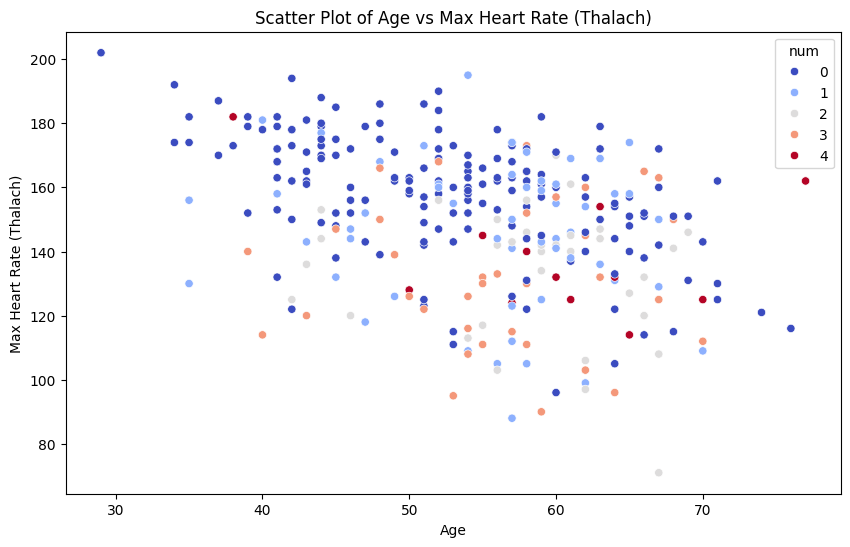

In [ ]:
# 7. Scatter Plot for relationship visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='thalach', hue='num', palette='coolwarm')
plt.title('Scatter Plot of Age vs Max Heart Rate (Thalach)')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (Thalach)')
plt.show()

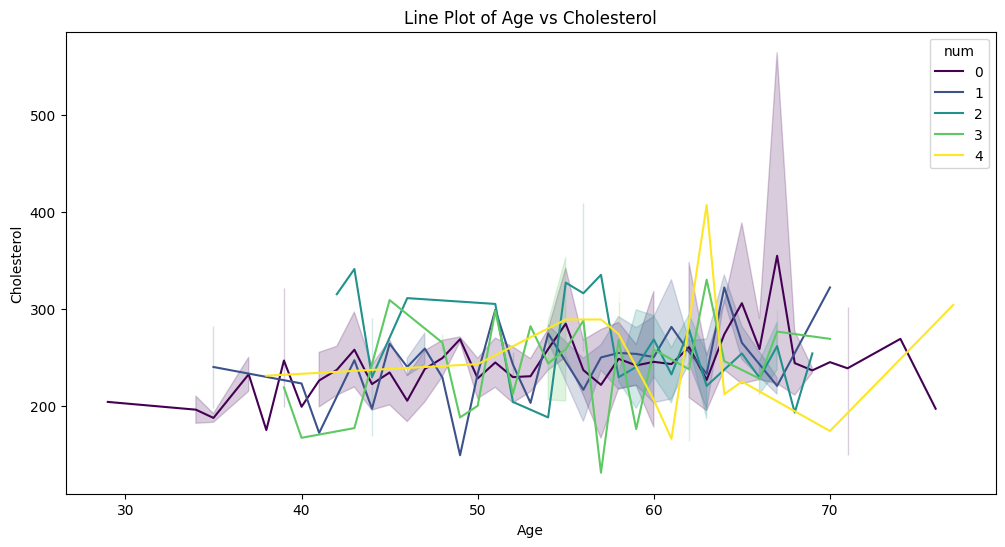

In [ ]:
# 8. Line Plot to observe trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='age', y='chol', hue='num', palette='viridis')
plt.title('Line Plot of Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

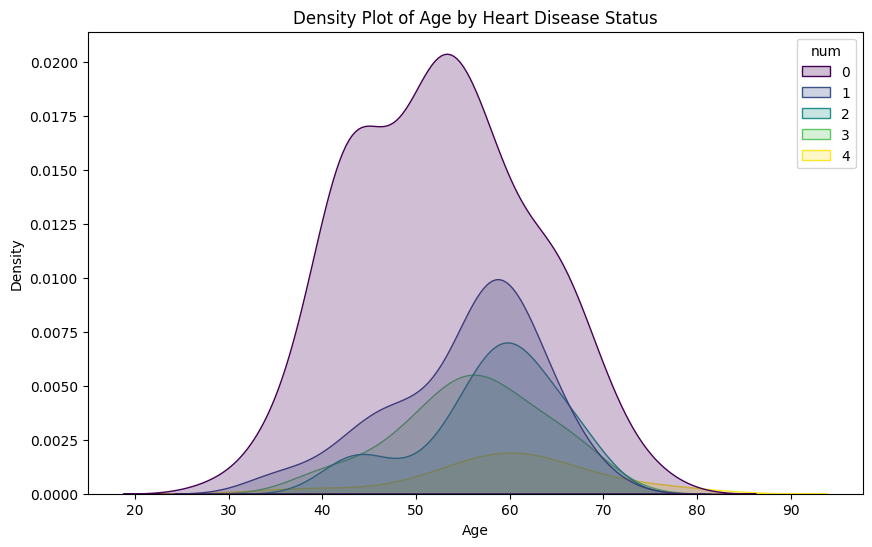

In [ ]:
# 9. Density Plot to visualize data distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='num', fill=True, palette='viridis')
plt.title('Density Plot of Age by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

<ipython-input-23-c72945764445>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cp', y='num', data=df, ci=None, palette='magma')
<ipython-input-23-c72945764445>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cp', y='num', data=df, ci=None, palette='magma')


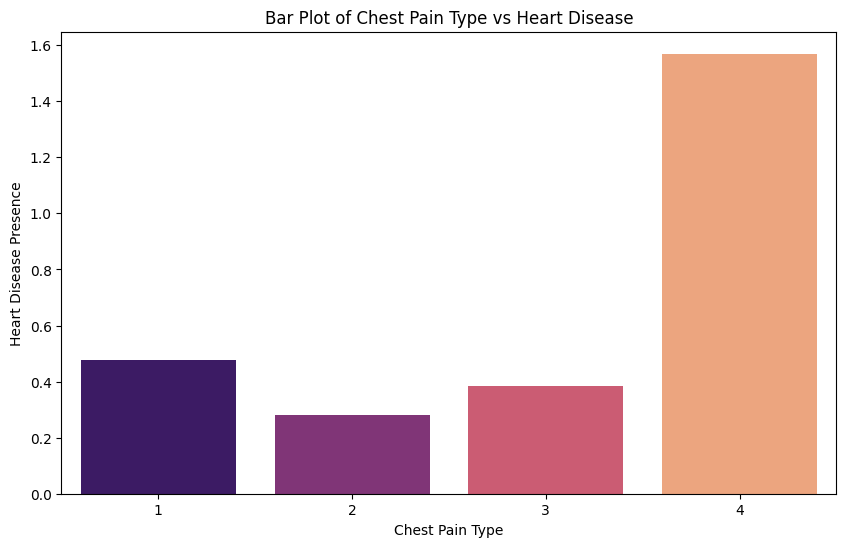

In [ ]:
# 10. Bar Plot for categorical feature distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='cp', y='num', data=df, ci=None, palette='magma')
plt.title('Bar Plot of Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Heart Disease Presence')
plt.show()

In [ ]:
# Step 5: Define and Tune Models

# Random Forest Tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_tuned_model = RandomizedSearchCV(rf_model, rf_params, n_iter=30, cv=5, scoring='accuracy', random_state=42)
rf_tuned_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=30,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Evaluate Random Forest
rf_best_model = rf_tuned_model.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.92      0.89      0.91        27
           2       0.96      1.00      0.98        26
           3       0.96      1.00      0.98        27
           4       1.00      1.00      1.00        32

    accuracy                           0.96       130
   macro avg       0.96      0.96      0.96       130
weighted avg       0.96      0.96      0.96       130



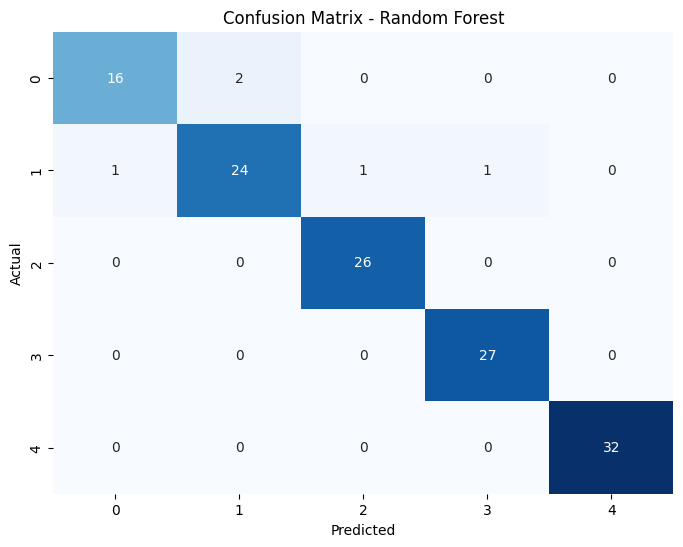

In [ ]:
# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

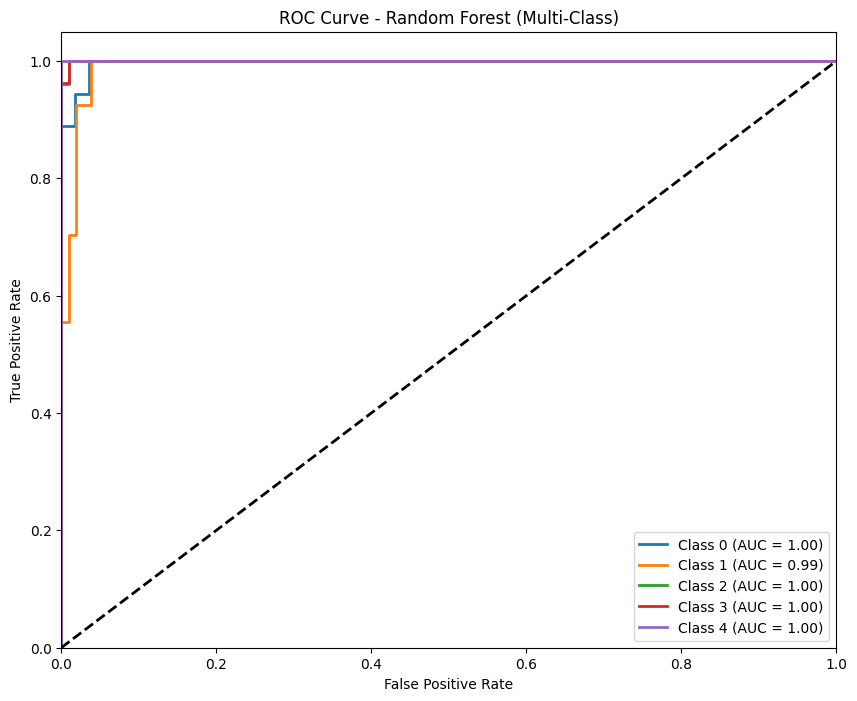

In [ ]:
# Binarize the output to handle multi-class targets (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])  # Adjust the classes as per your dataset

# Compute ROC curve and ROC area for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], rf_best_model.predict_proba(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Multi-Class)')
plt.legend(loc='lower right')
plt.show()

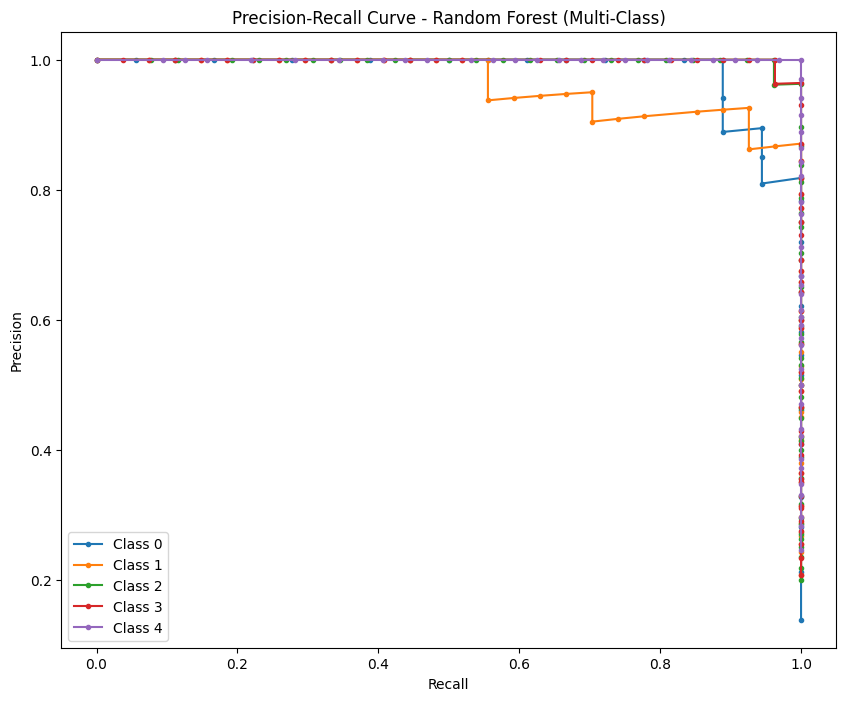

In [ ]:
# Plot Precision-Recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], rf_best_model.predict_proba(X_test)[:, i])
    plt.plot(recall, precision, marker='.', label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest (Multi-Class)')
plt.legend()
plt.show()

In [ ]:
# SVM Tuning
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}
svm_model = SVC(class_weight='balanced', probability=True, random_state=42)
svm_tuned_model = RandomizedSearchCV(svm_model, svm_params, n_iter=30, cv=5, scoring='accuracy', random_state=42)
svm_tuned_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=SVC(class_weight='balanced', probability=True,
                                 random_state=42),
                   n_iter=30,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='accuracy')

In [ ]:
# Evaluate SVM
svm_best_model = svm_tuned_model.best_estimator_
y_pred_svm = svm_best_model.predict(X_test)
print("SVM")
print(classification_report(y_test, y_pred_svm))

SVM
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.96      0.93      0.94        27
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        32

    accuracy                           0.98       130
   macro avg       0.97      0.97      0.97       130
weighted avg       0.98      0.98      0.98       130



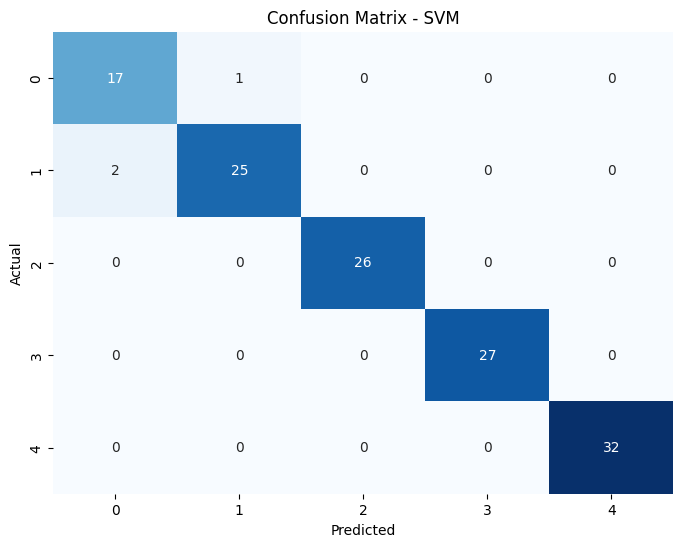

In [ ]:
# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

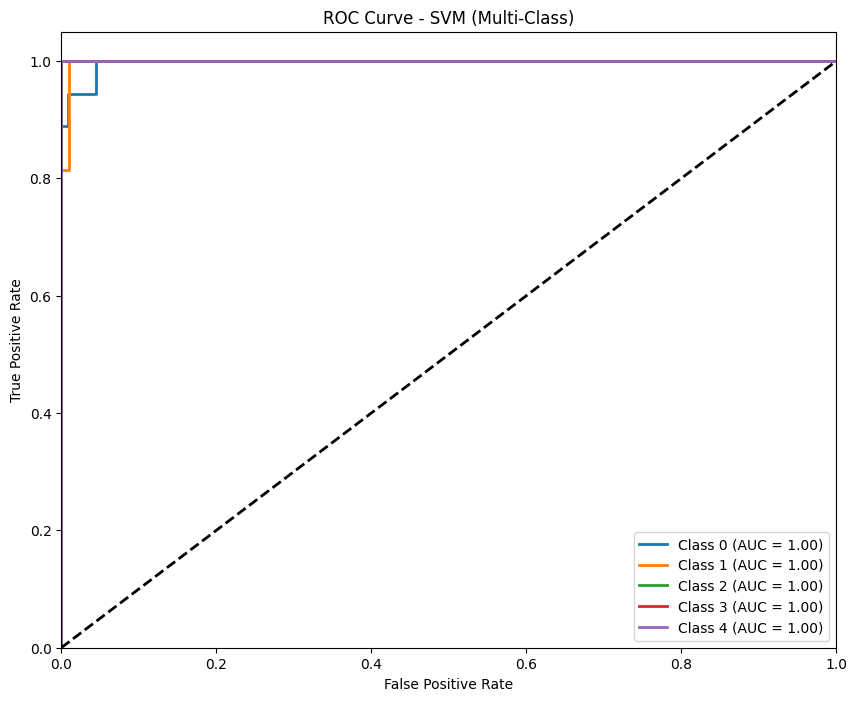

In [ ]:
# Plotting the ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_best_model.predict_proba(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Multi-Class)')
plt.legend(loc='lower right')
plt.show()

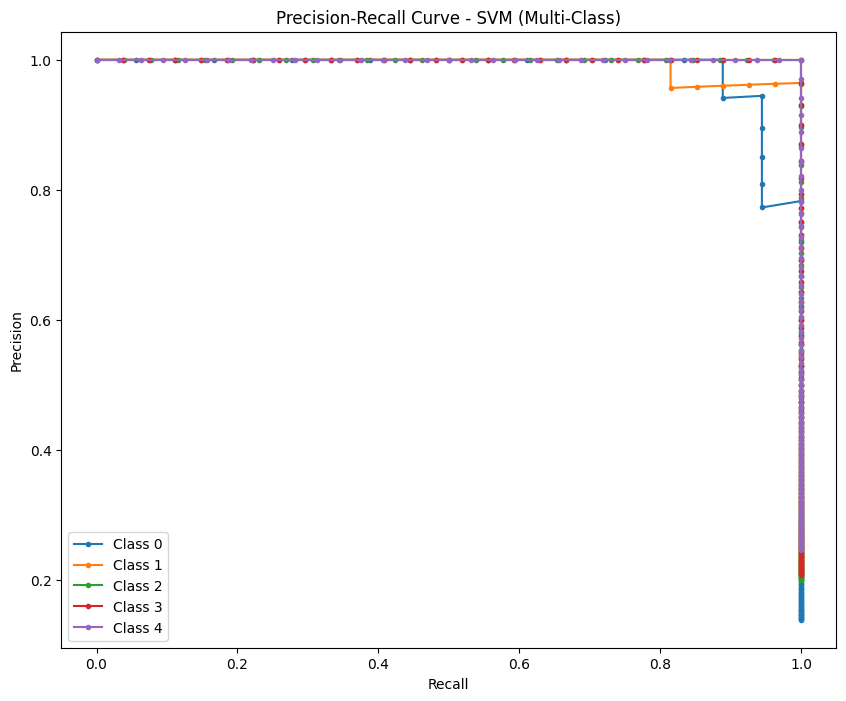

In [ ]:
# Plotting the Precision-Recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], svm_best_model.predict_proba(X_test)[:, i])
    plt.plot(recall, precision, marker='.', label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM (Multi-Class)')
plt.legend()
plt.show()

In [ ]:
# XGBoost Tuning
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_tuned_model = RandomizedSearchCV(xgb_model, xgb_params, n_iter=30, cv=5, scoring='accuracy', random_state=42)
xgb_tuned_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=30,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Evaluate XGBoost
xgb_best_model = xgb_tuned_model.best_estimator_
y_pred_xgb = xgb_best_model.predict(X_test)
print("XGBoost")
print(classification_report(y_test, y_pred_xgb))

XGBoost
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.92      0.81      0.86        27
           2       0.96      1.00      0.98        26
           3       0.93      0.96      0.95        27
           4       0.94      1.00      0.97        32

    accuracy                           0.94       130
   macro avg       0.94      0.93      0.93       130
weighted avg       0.94      0.94      0.94       130



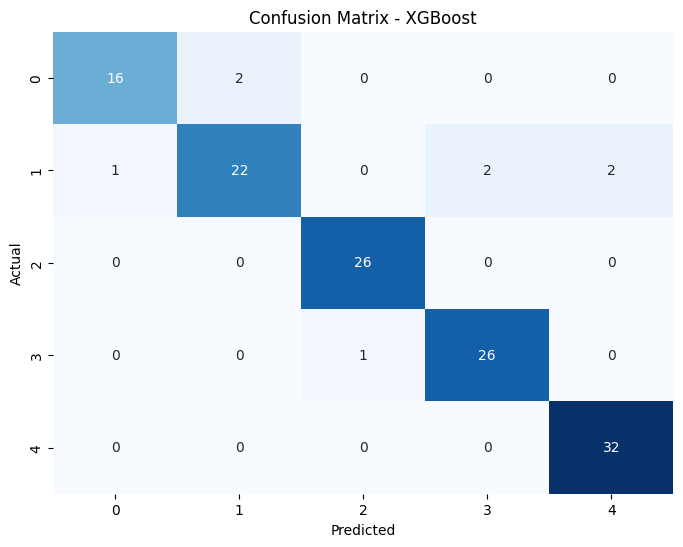

In [ ]:
# Define the full set of classes expected in the dataset
classes = [0, 1, 2, 3, 4]  # Modify this list based on your specific classes

# Compute the confusion matrix with all expected classes
cm = confusion_matrix(y_test, y_pred_xgb, labels=classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

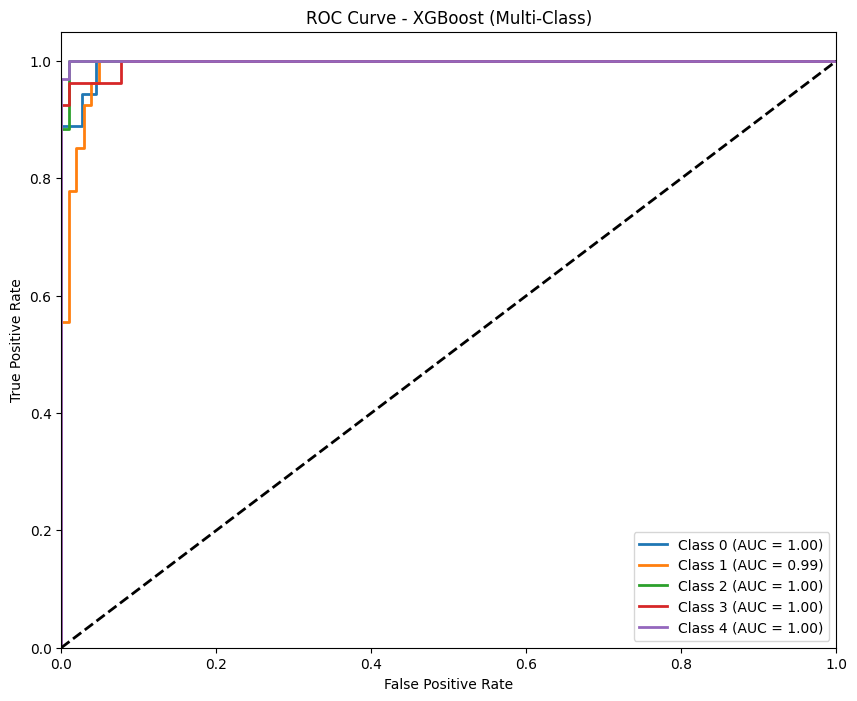

In [ ]:
# Plotting the ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], xgb_best_model.predict_proba(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (Multi-Class)')
plt.legend(loc='lower right')
plt.show()

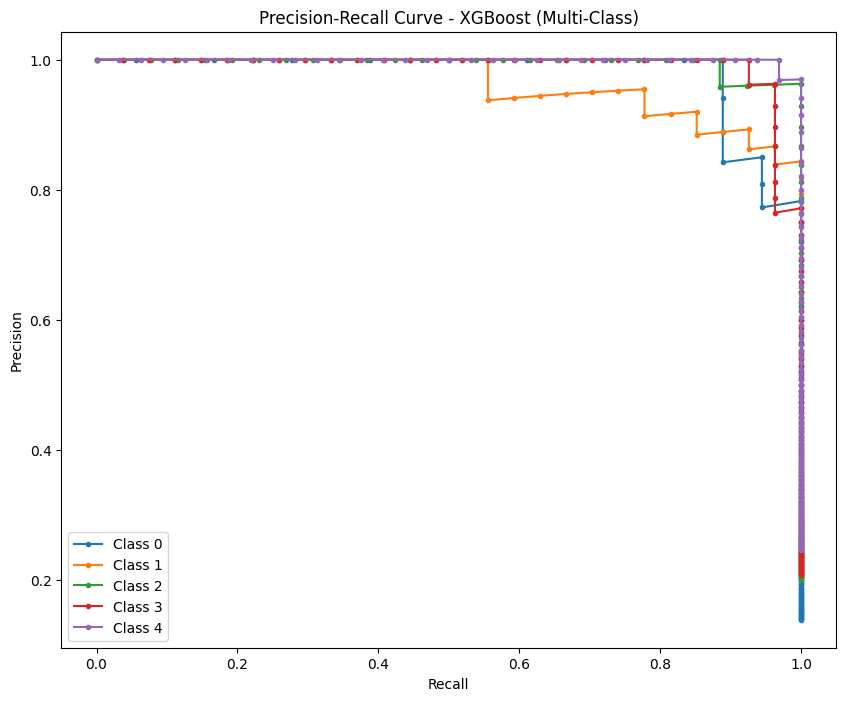

In [ ]:
# Plotting the Precision-Recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], xgb_best_model.predict_proba(X_test)[:, i])
    plt.plot(recall, precision, marker='.', label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost (Multi-Class)')
plt.legend()
plt.show()

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# Evaluate Logistic Regression
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))

Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.85      0.85      0.85        27
           2       0.96      0.88      0.92        26
           3       0.93      0.96      0.95        27
           4       0.94      1.00      0.97        32

    accuracy                           0.92       130
   macro avg       0.92      0.92      0.92       130
weighted avg       0.92      0.92      0.92       130



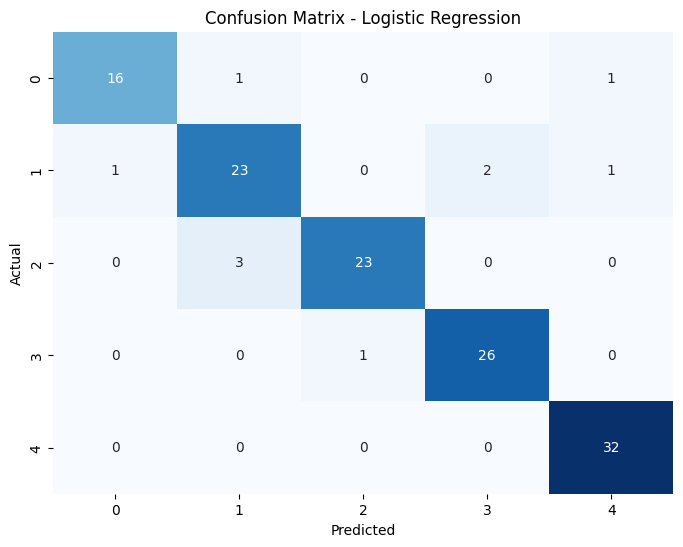

In [ ]:
# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

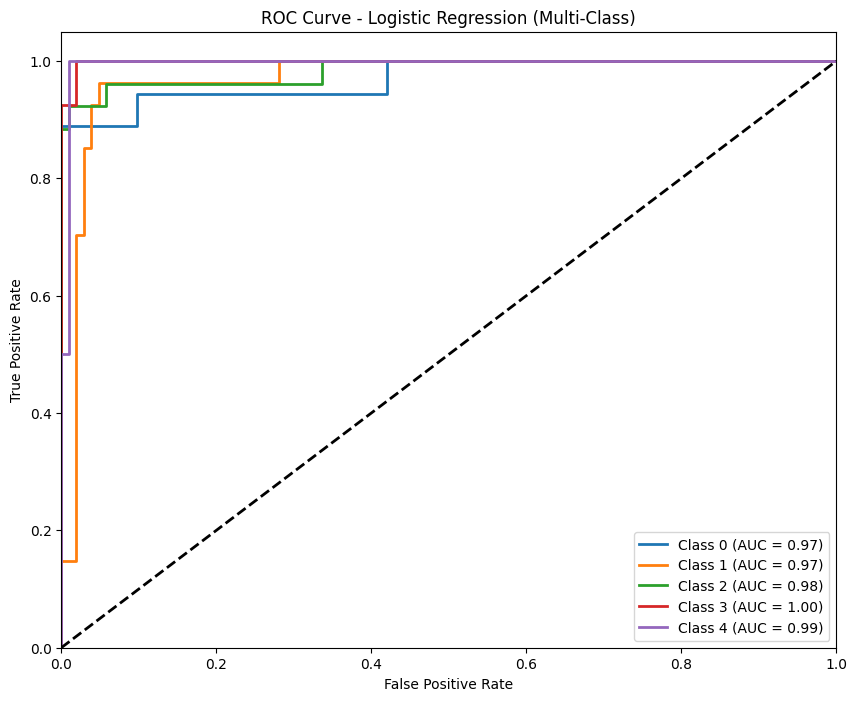

In [ ]:
# Plotting the ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], lr_model.predict_proba(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Multi-Class)')
plt.legend(loc='lower right')
plt.show()

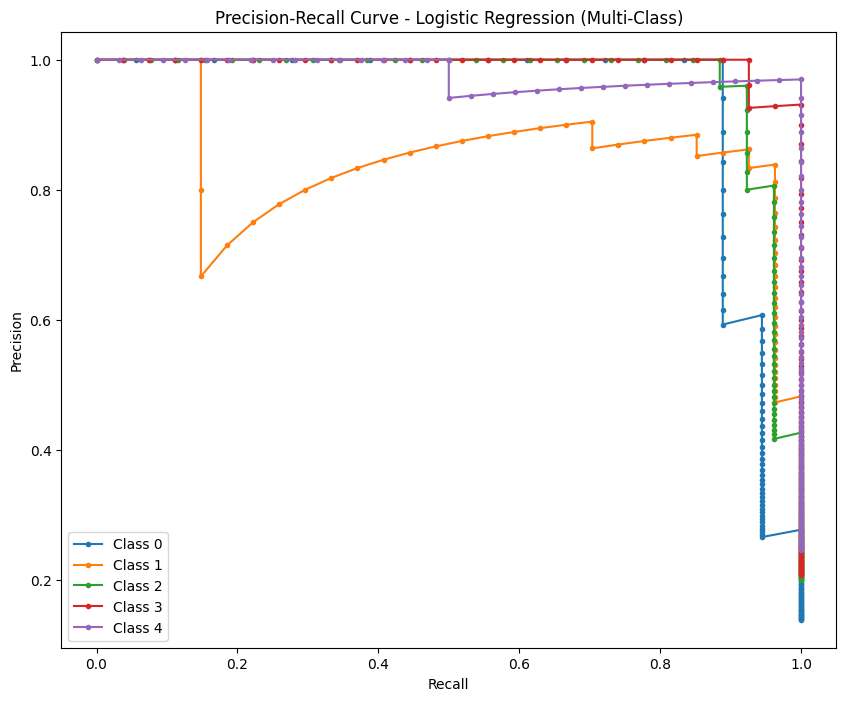

In [ ]:
# Plotting the Precision-Recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], lr_model.predict_proba(X_test)[:, i])
    plt.plot(recall, precision, marker='.', label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression (Multi-Class)')
plt.legend()
plt.show()